In [14]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Cargar el dataset
df = pd.read_csv('../data/transaction_data.csv')

In [3]:
# Mostrar las primeras filas del dataset
df.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


In [4]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [5]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             10000 non-null  int64  
 10  transaction_description  10000 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 859.5+ KB


In [6]:
# Revisión de valores nulos
df.isnull().sum()

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64

In [7]:
# Eliminación de duplicados
df.drop_duplicates(inplace=True)

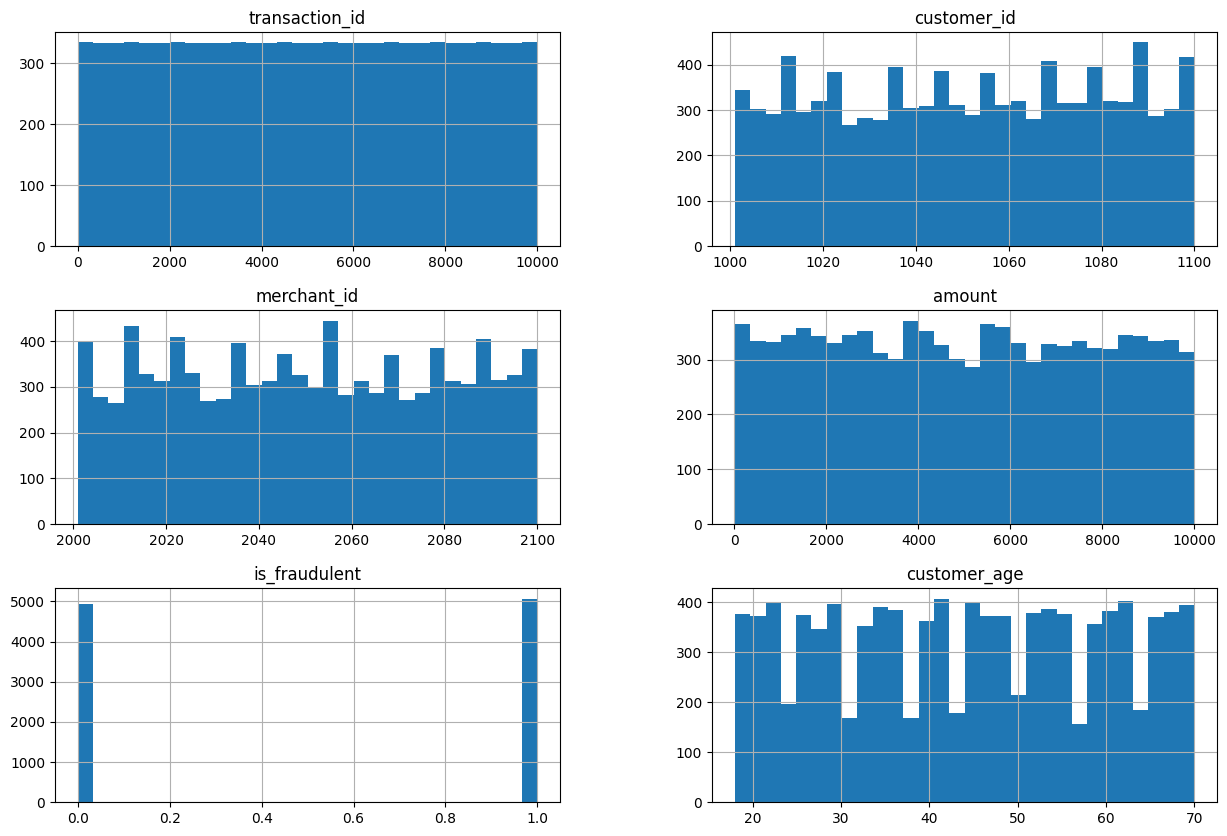

In [8]:
# Visualización de distribuciones de características numéricas
df.hist(bins=30, figsize=(15, 10))
plt.show()

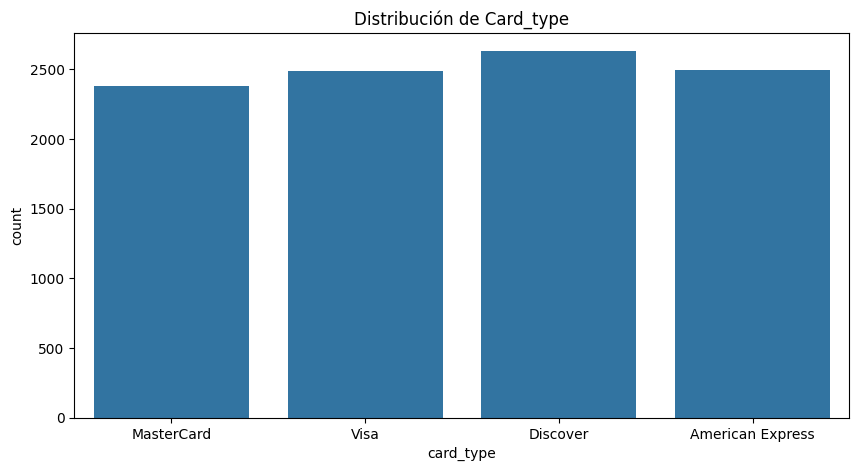

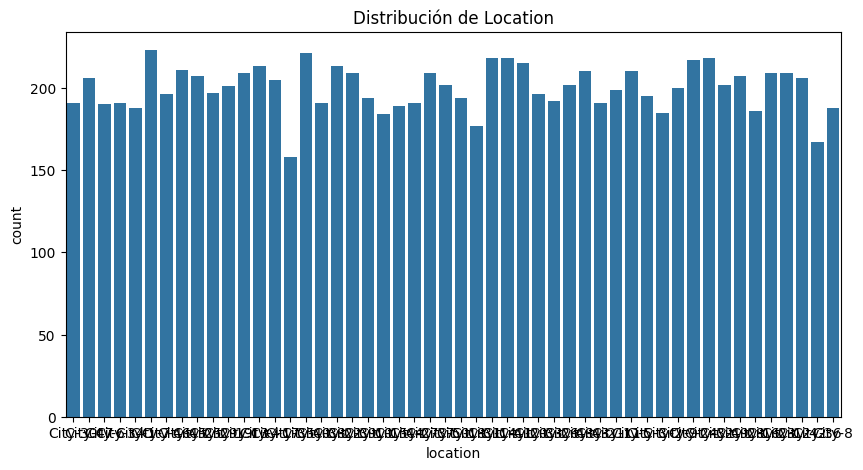

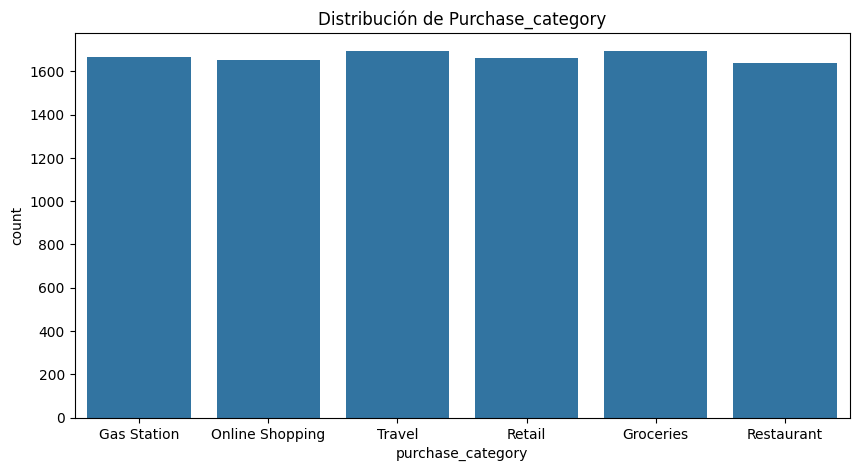

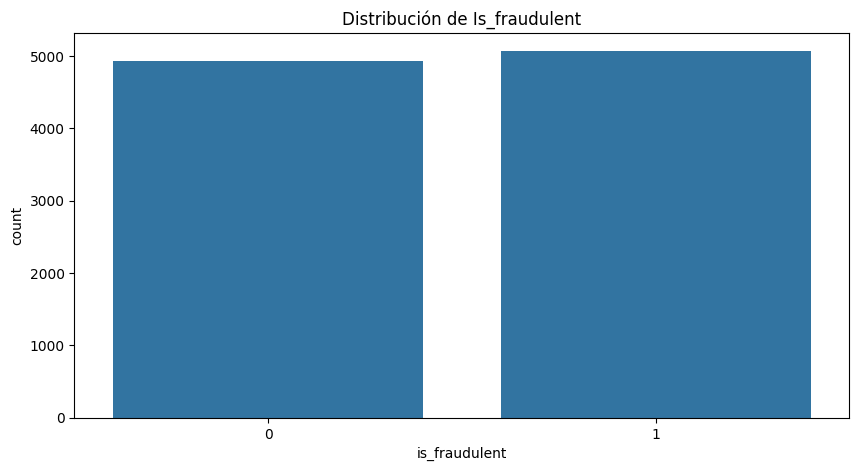

In [9]:
# Visualización de distribuciones de características categóricas
categorical_features = ['card_type', 'location', 'purchase_category', 'is_fraudulent']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribución de {feature.capitalize()}')
    plt.show()

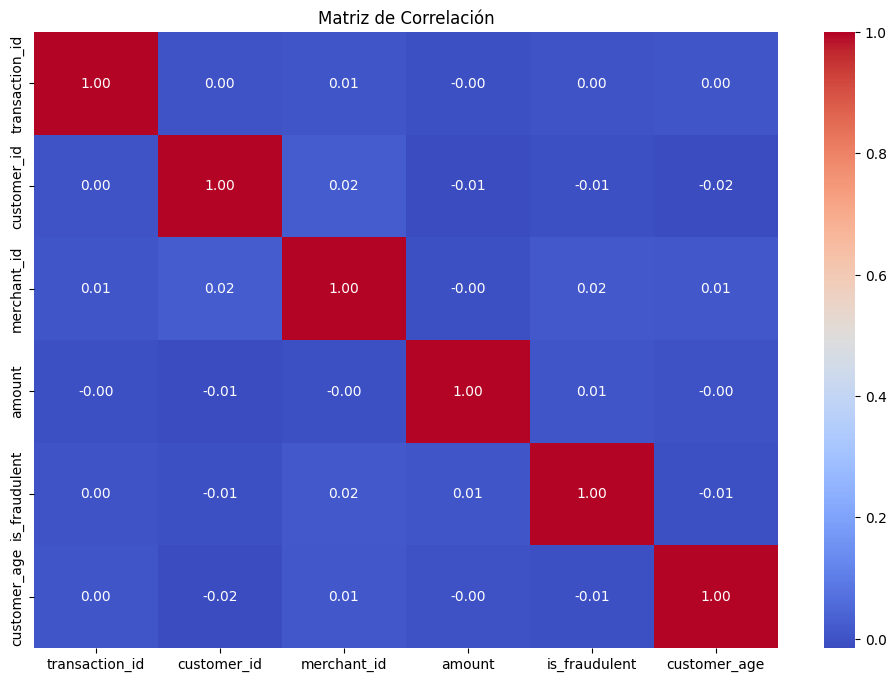

In [10]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Matriz de Correlación
plt.figure(figsize=(12, 8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [11]:
# Mostrar el número de valores nulos por columna
print(df.isnull().sum())

transaction_id             0
customer_id                0
merchant_id                0
amount                     0
transaction_time           0
is_fraudulent              0
card_type                  0
location                   0
purchase_category          0
customer_age               0
transaction_description    0
dtype: int64


In [12]:
# Conversión de los tipos de datos para que sean correctos
df['transaction_time'] = pd.to_datetime(df['transaction_time'])
df['amount'] = df['amount'].astype(float)
df['customer_age'] = df['customer_age'].astype(int)

In [13]:
# Convertir variables categóricas a variables numéricas usando One-Hot Encoding
df = pd.get_dummies(df, columns=['card_type', 'location', 'purchase_category'])

In [15]:
# Seleccionar columnas numéricas para escalar
numerical_features = ['amount', 'customer_age']

In [16]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

In [17]:
# Ajustar y transformar los datos
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [19]:
# Guardar el DataFrame preprocesado en un archivo CSV
df.to_csv('../data/preprocessed_transaction_data.csv', index=False)